# Final Work - 
# AI Artist 🤖
## Production of Works

In [43]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.8.0
TF-Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  False


In [44]:
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(200, 200), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

6340608/6326906 [==============================] - 1s 0us/step


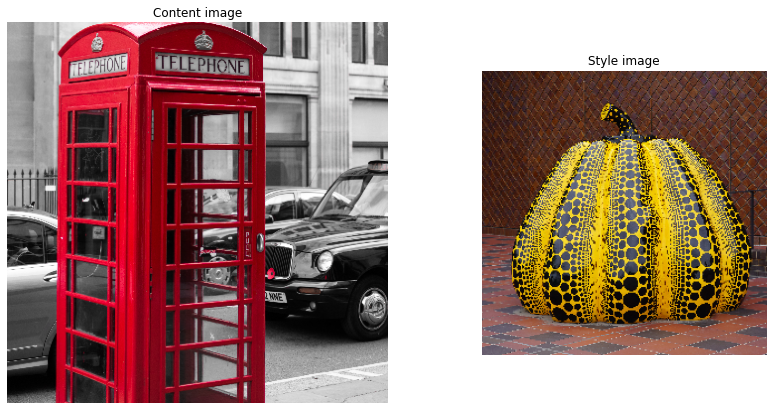

In [53]:
# @title Load example images  { display-mode: "form" }

#content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/01_Calanche_Piana.jpg/800px-01_Calanche_Piana.jpg'  # @param {type:"string"}
#style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/e/e1/%D0%9E%D0%B4%D1%82%D0%BE%D0%B9_%D1%88%D3%A9%D0%BD%D3%A9.jpg'  # @param {type:"string"}
content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/8/85/A_red_telephone_box_in_London%2C_UK.jpg'  # @param {type:"string"}
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/d/d3/%E8%8D%89%E9%96%93%E5%BD%8C%E7%94%9F_%E5%8D%97%E7%93%9C_%E7%A6%8F%E5%B2%A1%E7%BE%8E%E8%A1%93%E9%A4%A8.jpg'  # @param {type:"string"}
#https://upload.wikimedia.org/wikipedia/commons/a/a8/Vangogh.jpg
#https://upload.wikimedia.org/wikipedia/commons/d/d8/Amiga_A1000_IMG_4275.jpg
#https://upload.wikimedia.org/wikipedia/commons/3/39/Feld_mit_Kornhocken_von_August_Haake.jpg
#https://upload.wikimedia.org/wikipedia/commons/5/5f/Tower_Bridge_London_Dusk_Feb_2006.jpg
#https://upload.wikimedia.org/wikipedia/commons/0/04/London_Eye_by_Day.jpg
#https://upload.wikimedia.org/wikipedia/commons/9/98/Stanis%C5%82aw_Osostowicz_-_Ch%C5%82op_-_Google_Art_Project.jpg
#https://upload.wikimedia.org/wikipedia/commons/5/56/St_Cyprian%27s_Church_Sanctuary%2C_Clarence_Gate%2C_London%2C_UK_-_Diliff.jpg
#Admiralty Arch：https://upload.wikimedia.org/wikipedia/commons/6/6c/Admiralty_Arch%2C_London%2C_England_-_June_2009.jpg
#https://upload.wikimedia.org/wikipedia/commons/6/60/Roof_hafez_tomb.jpg
#https://upload.wikimedia.org/wikipedia/commons/7/7e/Ernst_Ludwig_Kirchner_-_Czardas_dancers_-_Google_Art_Project.jpg
#https://upload.wikimedia.org/wikipedia/commons/a/a5/Venus_de_Milo_%28replica%2C_Slovenian_National_Gallery%29.jpg
#"The Shard", highest building in London, England：https://upload.wikimedia.org/wikipedia/commons/1/15/London_Shard.jpg
#An Eastern Grey Squirrel ：https://upload.wikimedia.org/wikipedia/commons/7/7c/Eastern_Grey_Squirrel_in_St_James%27s_Park%2C_London_-_Nov_2006_edit.jpg
#https://upload.wikimedia.org/wikipedia/commons/6/6e/London_%28UK%29%2C_Elizabeth_Tower%2C_-Big_Ben-_--_2010_--_1979.jpg
#https://upload.wikimedia.org/wikipedia/commons/8/8e/London_Bus_route_30.jpg
#https://upload.wikimedia.org/wikipedia/commons/e/ef/DogYearPaperCutting.jpg
#https://upload.wikimedia.org/wikipedia/commons/5/5f/London_MMB_P4_River_Thames.jpg
#https://upload.wikimedia.org/wikipedia/commons/6/6f/Katsushika_Hokusai%2C_published_by_Nishimuraya_Yohachi_%28Eijud%C5%8D%29_-_Fine_Wind%2C_Clear_Weather_%28Gaif%C5%AB_kaisei%29%2C_also_known_as_Red_Fuji%2C_from_the_series_Thirty-six_Views_o..._-_Google_Art_Project_-_Cropped.jpg
#https://upload.wikimedia.org/wikipedia/commons/d/d3/%E8%8D%89%E9%96%93%E5%BD%8C%E7%94%9F_%E5%8D%97%E7%93%9C_%E7%A6%8F%E5%B2%A1%E7%BE%8E%E8%A1%93%E9%A4%A8.jpg
#london telephone boxes：https://upload.wikimedia.org/wikipedia/commons/9/91/London_telephone_boxes.jpg
output_image_size = 384  # @param {type:"integer"}

# The content image size can be arbitrary.
content_img_size = (output_image_size, output_image_size)
# The style prediction model was trained with image size 256 and it's the 
# recommended image size for the style image (though, other sizes work as 
# well but will lead to different results).
style_img_size = (256, 256)  # Recommended to keep it at 256.

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[1,1], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

In [54]:
# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [55]:
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

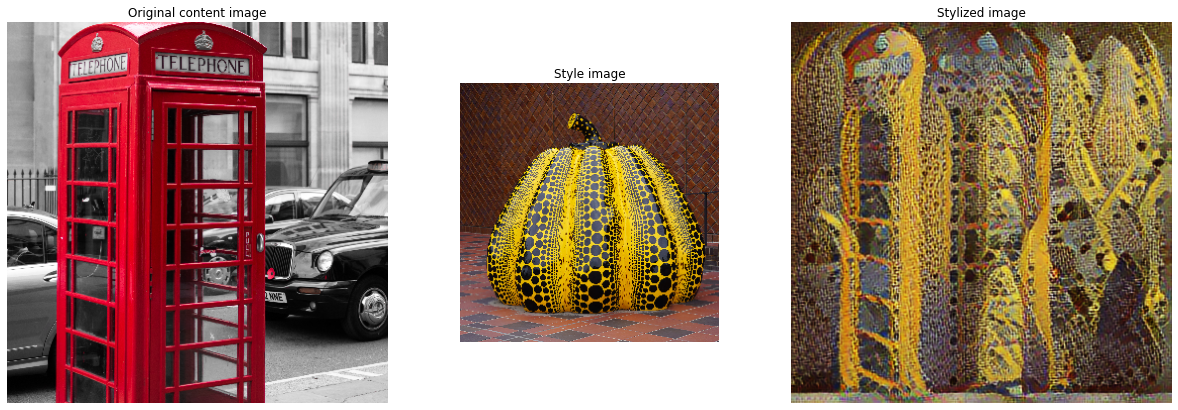

In [56]:
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])